#Лабораторна робота №5

Завдання №1

In [ ]:
# Імпорт необхідних бібліотек
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Завантаження датасету Ірис
iris = load_iris()
x = iris.data

df = pd.DataFrame(x, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
print("\nРозмір датасету:", df.shape)


Розмір датасету: (150, 4)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


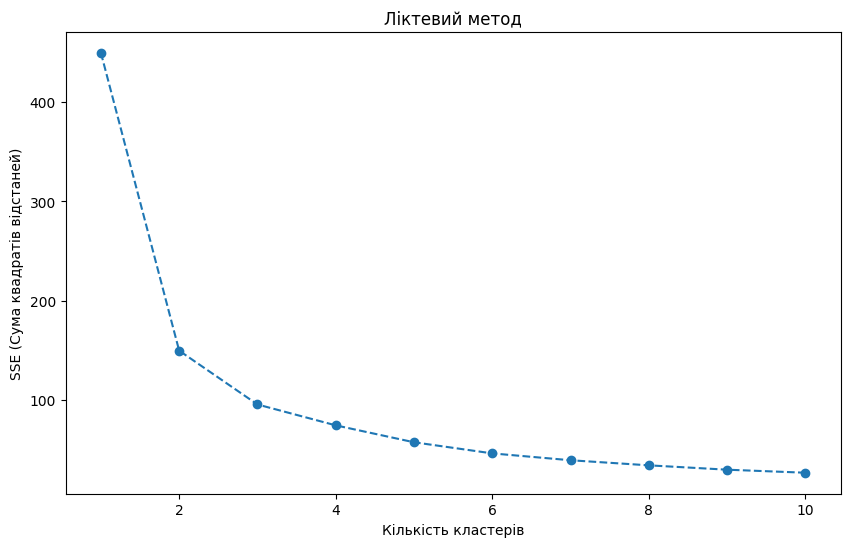

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_2d = pd.DataFrame (X_scaled, columns=iris.feature_names).iloc[:, 1:] # Select all rows and all columns except the first
wcss_2d = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X_2d)
  wcss_2d.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range (1, 11), wcss_2d, marker='o', linestyle='--')
plt.title('Ліктевий метод')
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE (Сума квадратів відстаней)')
plt.show()

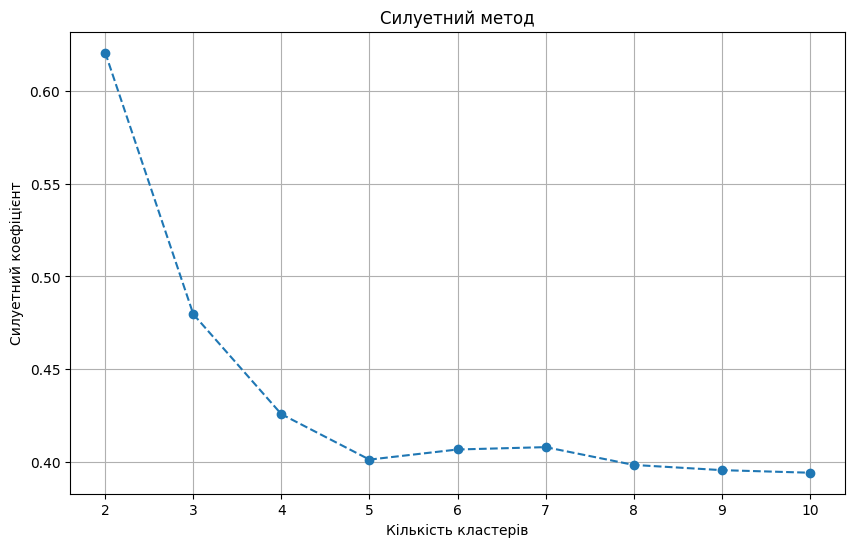

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  cluster_labels = kmeans.fit_predict(X_2d)
  silhouette_avg = silhouette_score (X_2d, cluster_labels)
  silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Силуетний метод')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')
plt.grid(True)
plt.show()

In [ ]:
# Визначення оптимальної кількості кластерів за методом силуетів
optimal_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f'Оптимальна кількість кластерів: {optimal_clusters}')

Оптимальна кількість кластерів: 2


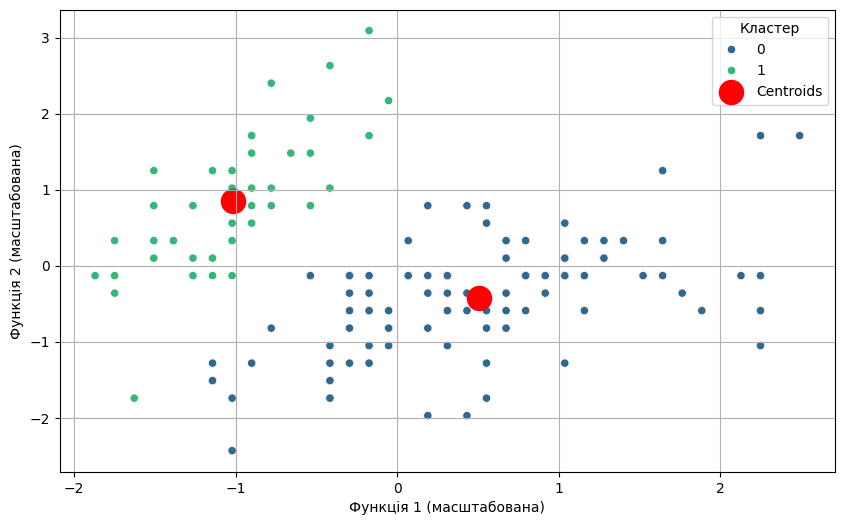

In [ ]:
#Візуалізувати кластери.
import seaborn as sns

kmeans = KMeans (n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Функція 1 (масштабована)')
plt.ylabel('Функція 2 (масштабована)')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()

Висновок - Після аналізу датасету Iris та визначення оптимальної кількості кластерів за допомогою методів ліктя та силуетів було з'ясовано, що найкращою кількістю кластерів є 2. Метод силуетів підтвердив, що коефіцієнт силуету для 2 кластерів є найвищим, що свідчить про добре відокремлені та компактні кластери.

Завдання №2

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Завантажуємо датасет
df = pd.read_csv('/content/drive/My Drive/Student_data.csv')

In [ ]:
#Виведення перших 5 рядків
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
df.shape

(2392, 15)

In [ ]:
df.dtypes

,0
StudentID,int64
Age,int64
Gender,int64
Ethnicity,int64
ParentalEducation,int64
StudyTimeWeekly,float64
Absences,int64
Tutoring,int64
ParentalSupport,int64
Extracurricular,int64


In [ ]:
#Перевірка на пропущені значення
print(df.isnull().sum())

# Заповнення пропущених значень середнім за стовпцем
df.fillna(df.mean(), inplace=True)

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [ ]:
#Перевірка на дублікати та їх видалення
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [ ]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [ ]:
print(df['GradeClass'].value_counts())

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Визначення ознак та цільової змінної
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

# Перетворення категоріальних змінних в числові
X = pd.get_dummies(X)

# Розподіл даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Моделі
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Ridge Regression': Ridge()
}

# Навчання та оцінка моделей
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")

Linear Regression - MSE: 0.5305115654523489, R2: 0.6449416484191344
Random Forest - MSE: 0.22980876826722338, R2: 0.8461946397526399
Ridge Regression - MSE: 0.5306525954784889, R2: 0.6448472604889448


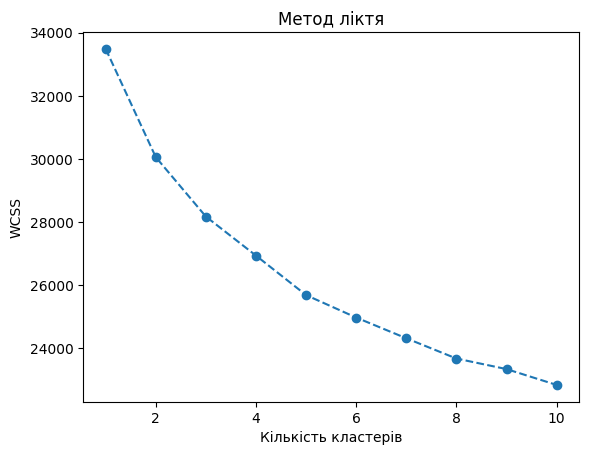

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Метод ліктя для визначення оптимальної кількості кластерів
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

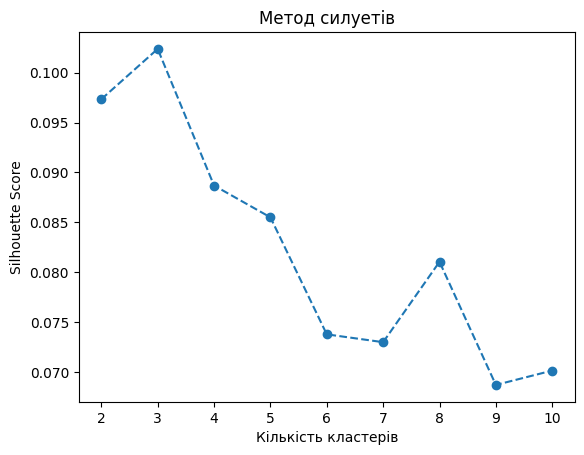

In [ ]:
# Метод силуетів для визначення оптимальної кількості кластерів
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.show()

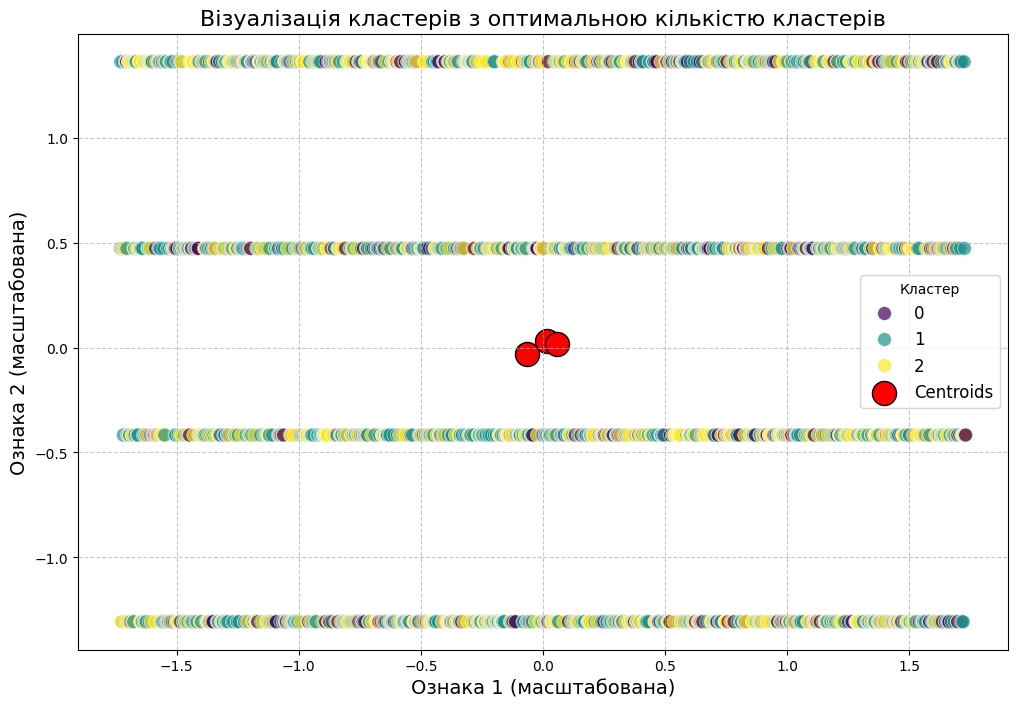

In [ ]:
# Візуалізація кластерів для оптимальної кількості кластерів
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Кластеризація з оптимальною кількістю кластерів
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(X_scaled)

# Візуалізація кластерів
plt.figure(figsize=(12, 8))

# Розсіяний графік для даних
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis', s=100, alpha=0.7, edgecolor='w', linewidth=0.5)

# Додавання центрів кластерів
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', edgecolor='k', linewidth=1)

# Налаштування графіка
plt.title('Візуалізація кластерів з оптимальною кількістю кластерів', fontsize=16)
plt.xlabel('Ознака 1 (масштабована)', fontsize=14)
plt.ylabel('Ознака 2 (масштабована)', fontsize=14)
plt.legend(title='Кластер', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Висновок: У даній роботі я використав датасет Student_data.csv. Тауож було використано метод ліктя та метод силуетів для визначення оптимальної кількості кластерів. Обидва методи вказали на оптимальну кількість кластерів — це 3.Також створив графік, що відображає кластери з використанням кольорів для відображення різних кластерів.
https://github.com/maksim-poliovyi/machine-learning/tree/main